Group: Seunghyeon (Hyeon) Kim

## stochastic reaction network simulation

<pre>
mu
0  S + I -> I
1  I -> R
2  R -> S
</pre>

In [ ]:
import numpy as np

In [ ]:
N = 300                         #### simulation length

T = np.zeros(N);            #### reaction time points

X = np.zeros((N,3)).astype('float');  #### state vector: [S,I,R]

In [ ]:
A1=np.array([-1., +1., 0.])
A2=np.array([0., -1., +1.])
A3=np.array([+1., 0., -1.])
DeltaN=np.vstack((A1, A2, A3))
DeltaN

array([[-1.,  1.,  0.],
       [ 0., -1.,  1.],
       [ 1.,  0., -1.]])

In [ ]:
### individual reaction probabilities
c=np.array([0.2, 0.3, 0.9]);

def q(x):
    ret = [c[0]*x[0]*x[1],
           c[1]*x[1],
           c[2]*x[2]]
    return ret

In [ ]:
### joint probability density
import random

def P(q):
    S=np.sum(q)
    if S>0:
        tau = np.random.exponential(scale=1/S)
        mu  = random.choices(range(len(q)), weights=q/S)[0]
    else:                                              ### no reaction can happen
        tau = 0
        mu  = -1
    return mu, tau

In [ ]:
def sim(x0):
    X[0,:]=x0
    for i in range(N-1):
        mu, tau =  P(q( X[i,:] ))
        if mu > -1:
            T[i+1]   = T[i] + tau
            X[i+1,:] = X[i,:] + DeltaN[mu]
        else:
            T[i+1]   = T[i]
            X[i+1,:] = X[i,:]

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

def plot():
  plt.figure(figsize=(12,4))
  plt.subplot(121)
  plt.plot(T,X[:,0])
  plt.plot(T,X[:,1])
  plt.xlabel('t')

  plt.subplot(122)
  plt.plot(T,X[:,1])
  plt.plot(T,X[:,2])
  plt.xlabel('t')

  plt.tight_layout()
  plt.show()

<ipython-input-56-0bca1e11e0f4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [ ]:

sim(x0=[500., 1., 0.])


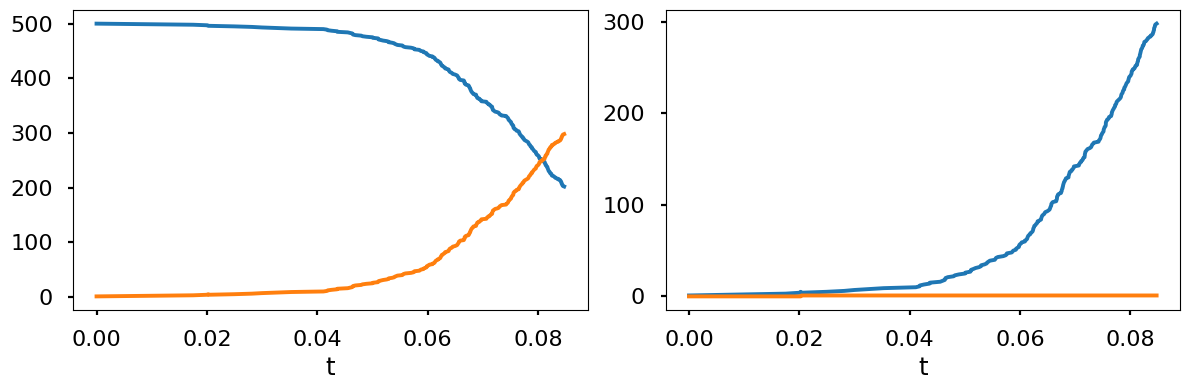

In [ ]:
plot()

In [ ]:
import networkx as nx
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import pearsonr

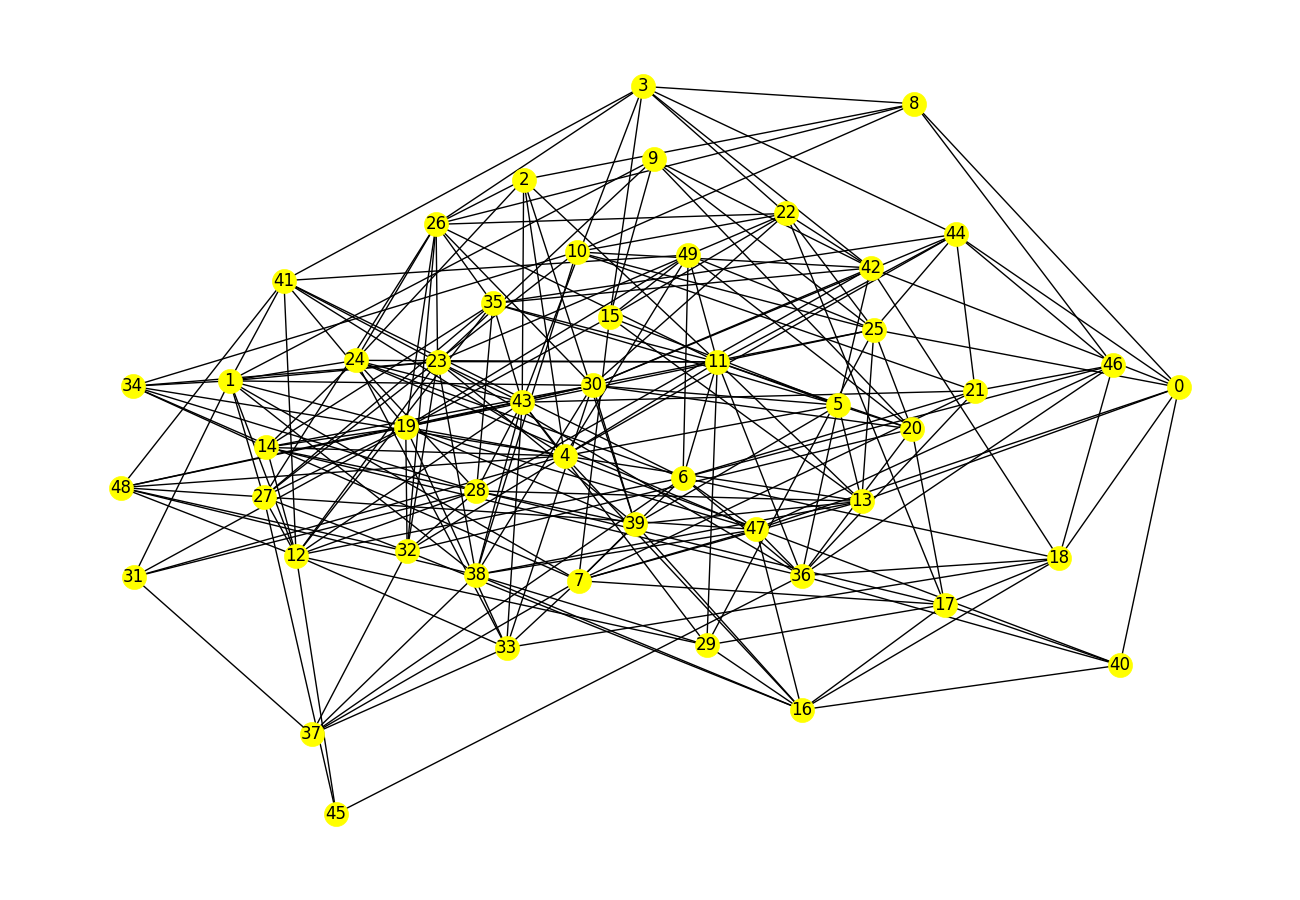

In [ ]:
ER = nx.erdos_renyi_graph(50,0.2,seed=19)
nx.draw(ER,with_labels=True,node_color='yellow')

In [ ]:
G = ER.copy()
deg = list(G.degree())
for i,k in deg:
    if k == 0:
        G.remove_node(i)

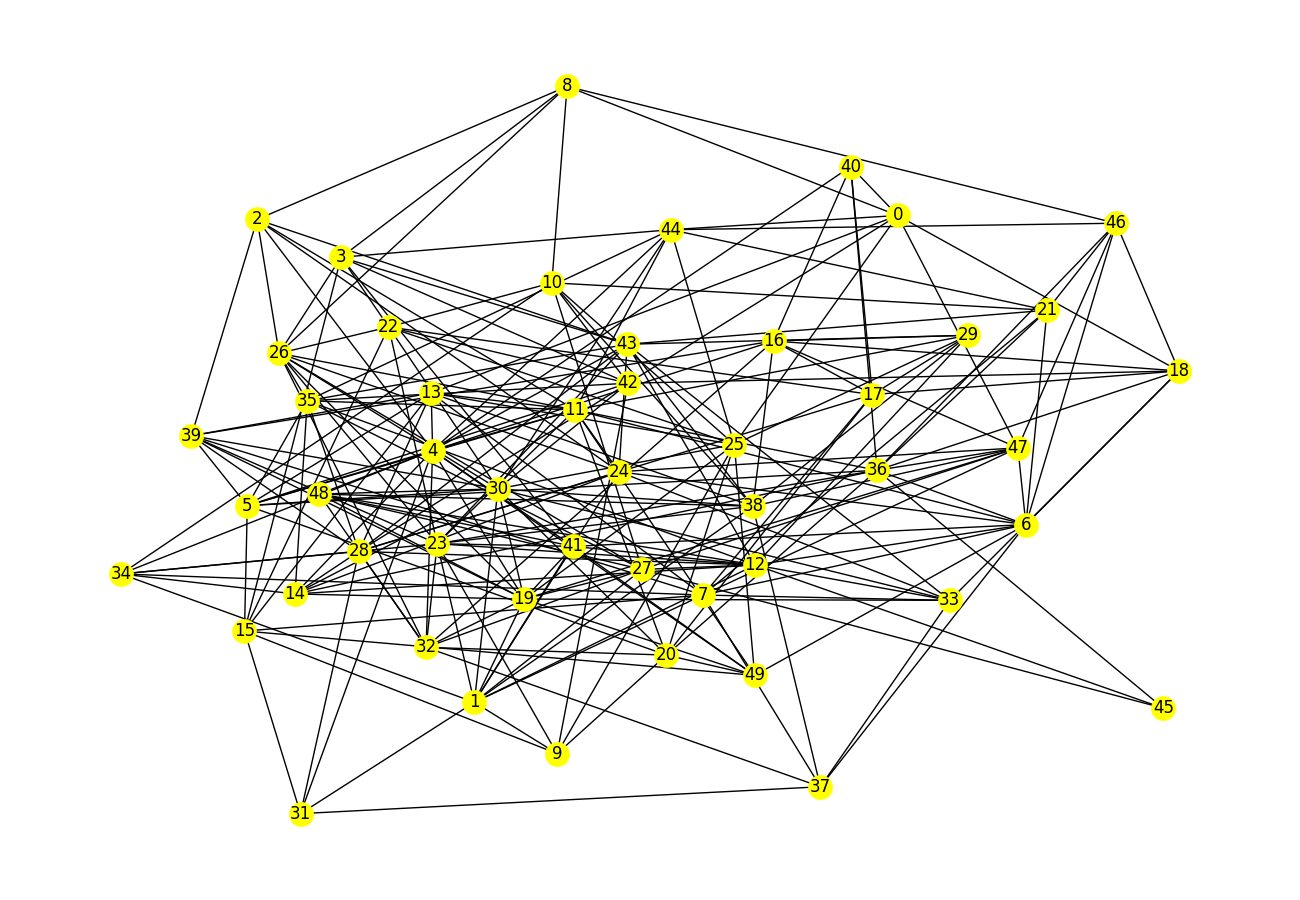

In [ ]:
nx.draw(G,with_labels=True,node_color='yellow')

In [ ]:
for eachPerson in G.nodes():
    G.nodes[eachPerson]['infected'] = False
G.nodes[4]['infected'] = True

{'infected': True}


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


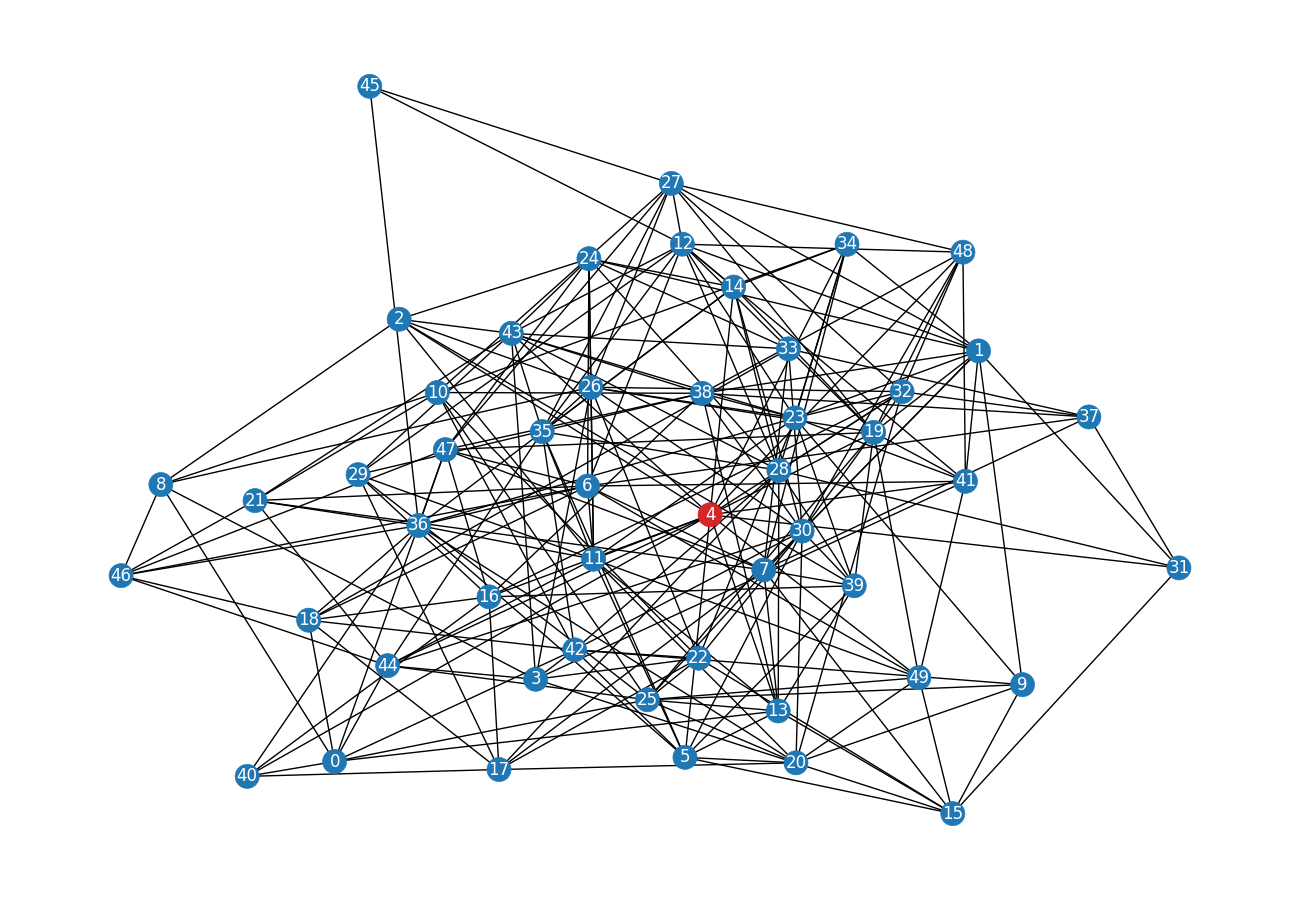

In [ ]:
# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
val_map = {
    True: "tab:red",
    False: "tab:blue",
}
values = []
for eachPerson in G.nodes():
    values.append(val_map[G.nodes[eachPerson]['infected']])
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()